In [1]:
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd
import pickle
import itertools
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
#     'patch.edgecolor': 'white',
    'axes.edgecolor': 'black',
    'savefig.edgecolor': 'white',
    'savefig.facecolor': 'white',
})

In [2]:
plt.rcParams['axes.linewidth'] = .55

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
with open('acceleration_fold_curve.pkl', mode='rb') as f: 
    acceleration_fold_curve = pickle.load(f)
with open('acceleration_fold_finetune_curve.pkl', mode='rb') as f: 
    acceleration_fold_finetune_curve = pickle.load(f)

In [5]:
def get_curve_df(fold_curve):
    return pd.DataFrame.from_dict(dict(
                dice = list(itertools.chain.from_iterable(
                    [np.mean(ax[k]['dice']) for _, ax in fd] for k in ['fastmri', 'center', 'ours'] for fd in fold_curve
                )),
                ssim = list(itertools.chain.from_iterable(
                    [np.mean(ax[k]['ssim']) for _, ax in fd] for k in ['fastmri', 'center', 'ours'] for fd in fold_curve
                )),
                ax = list(itertools.chain.from_iterable(
                    [ax_val for ax_val, _ in fd] for k in ['fastmri', 'center', 'ours'] for fd in fold_curve
                )),
                sampling = list(itertools.chain.from_iterable(
                    [k for _, ax in fd] for k in ['fastmri', 'center', 'ours'] for fd in fold_curve
                )),
                fold = list(itertools.chain.from_iterable(
                    [i for _, ax in fd] for k in ['fastmri', 'center', 'ours'] for i, fd in enumerate(fold_curve)
                )),
            ))

dice_ssim_folds = get_curve_df(acceleration_fold_curve)
dice_ssim_folds_finetune = get_curve_df(acceleration_fold_finetune_curve)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


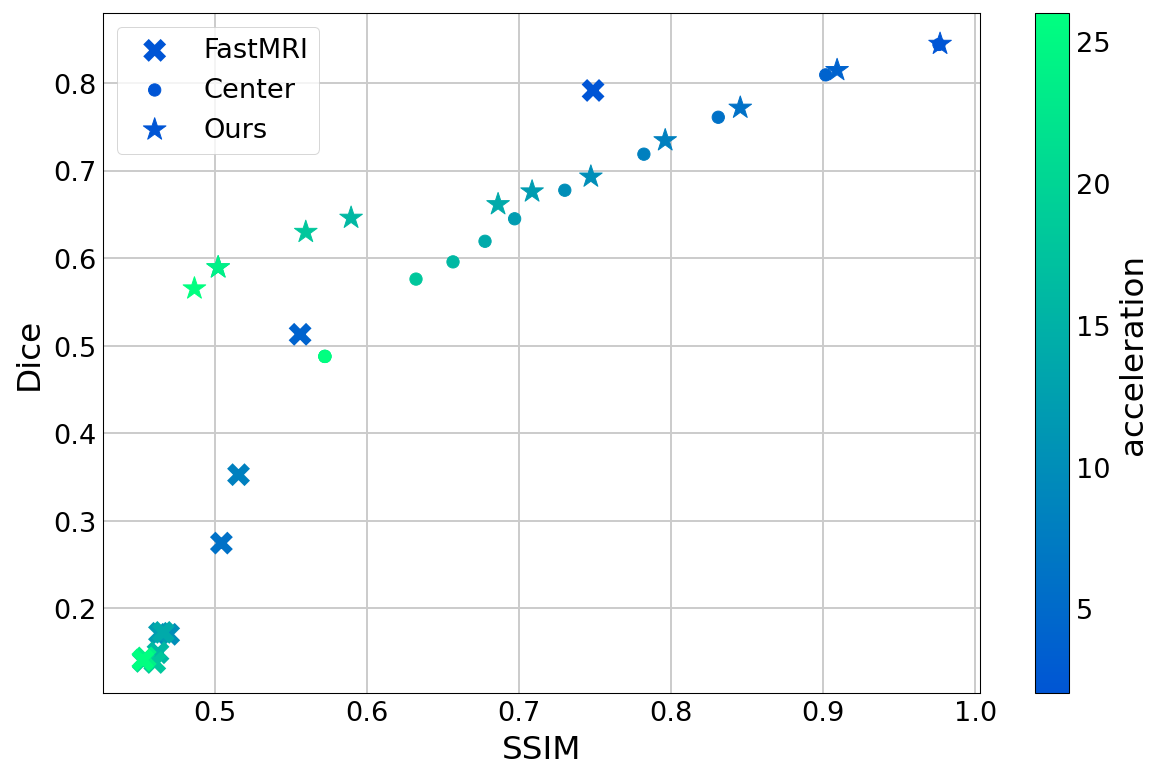

In [6]:
plt.figure(figsize=(9,6), dpi=140)
plt.scatter(dice_ssim_folds[(dice_ssim_folds.sampling == 'fastmri') & (dice_ssim_folds.fold==0)].ssim, 
            dice_ssim_folds[(dice_ssim_folds.sampling == 'fastmri') & (dice_ssim_folds.fold==0)].dice, 
            c=dice_ssim_folds[(dice_ssim_folds.sampling == 'fastmri') & (dice_ssim_folds.fold==0)].ax,
            marker='x', s=80,
            label='FastMRI', cmap=plt.cm.winter, norm=plt.matplotlib.colors.CenteredNorm(8),
)
plt.scatter(dice_ssim_folds[(dice_ssim_folds.sampling == 'center') & (dice_ssim_folds.fold==0)].ssim, 
            dice_ssim_folds[(dice_ssim_folds.sampling == 'center') & (dice_ssim_folds.fold==0)].dice, 
            c=dice_ssim_folds[(dice_ssim_folds.sampling == 'center') & (dice_ssim_folds.fold==0)].ax,
            marker='o', s=40,
            label='Center', cmap=plt.cm.winter, norm=plt.matplotlib.colors.CenteredNorm(8),
)
plt.scatter(dice_ssim_folds[(dice_ssim_folds.sampling == 'ours') & (dice_ssim_folds.fold==0)].ssim, 
            dice_ssim_folds[(dice_ssim_folds.sampling == 'ours') & (dice_ssim_folds.fold==0)].dice, 
            c=dice_ssim_folds[(dice_ssim_folds.sampling == 'ours') & (dice_ssim_folds.fold==0)].ax,
            marker='*', s=150,
            label='Ours', cmap=plt.cm.winter, norm=plt.matplotlib.colors.CenteredNorm(8),
)
plt.clim(2, 26)
plt.xlabel('SSIM')
plt.ylabel('Dice')
plt.colorbar(label='acceleration')
plt.legend()
# plt.show()
plt.savefig('acdc-ax-curve-2.eps', bbox_inches = "tight")

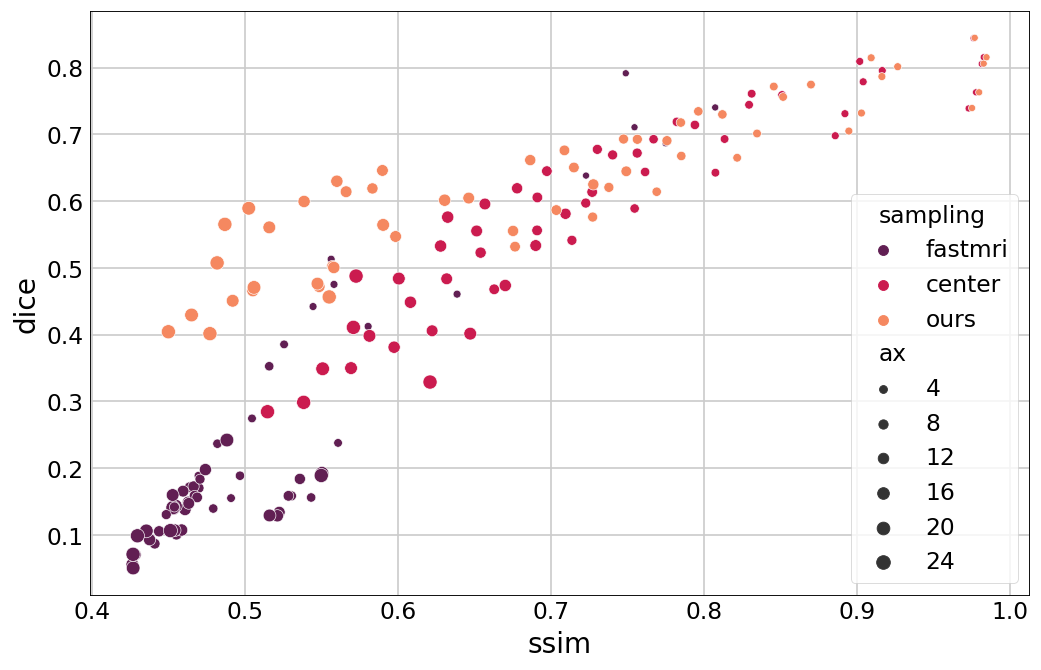

In [7]:
plt.figure(figsize=(9,6), dpi=120)
sns.scatterplot(data=dice_ssim_folds, x='ssim', y='dice', hue='sampling', size='ax', palette='rocket')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


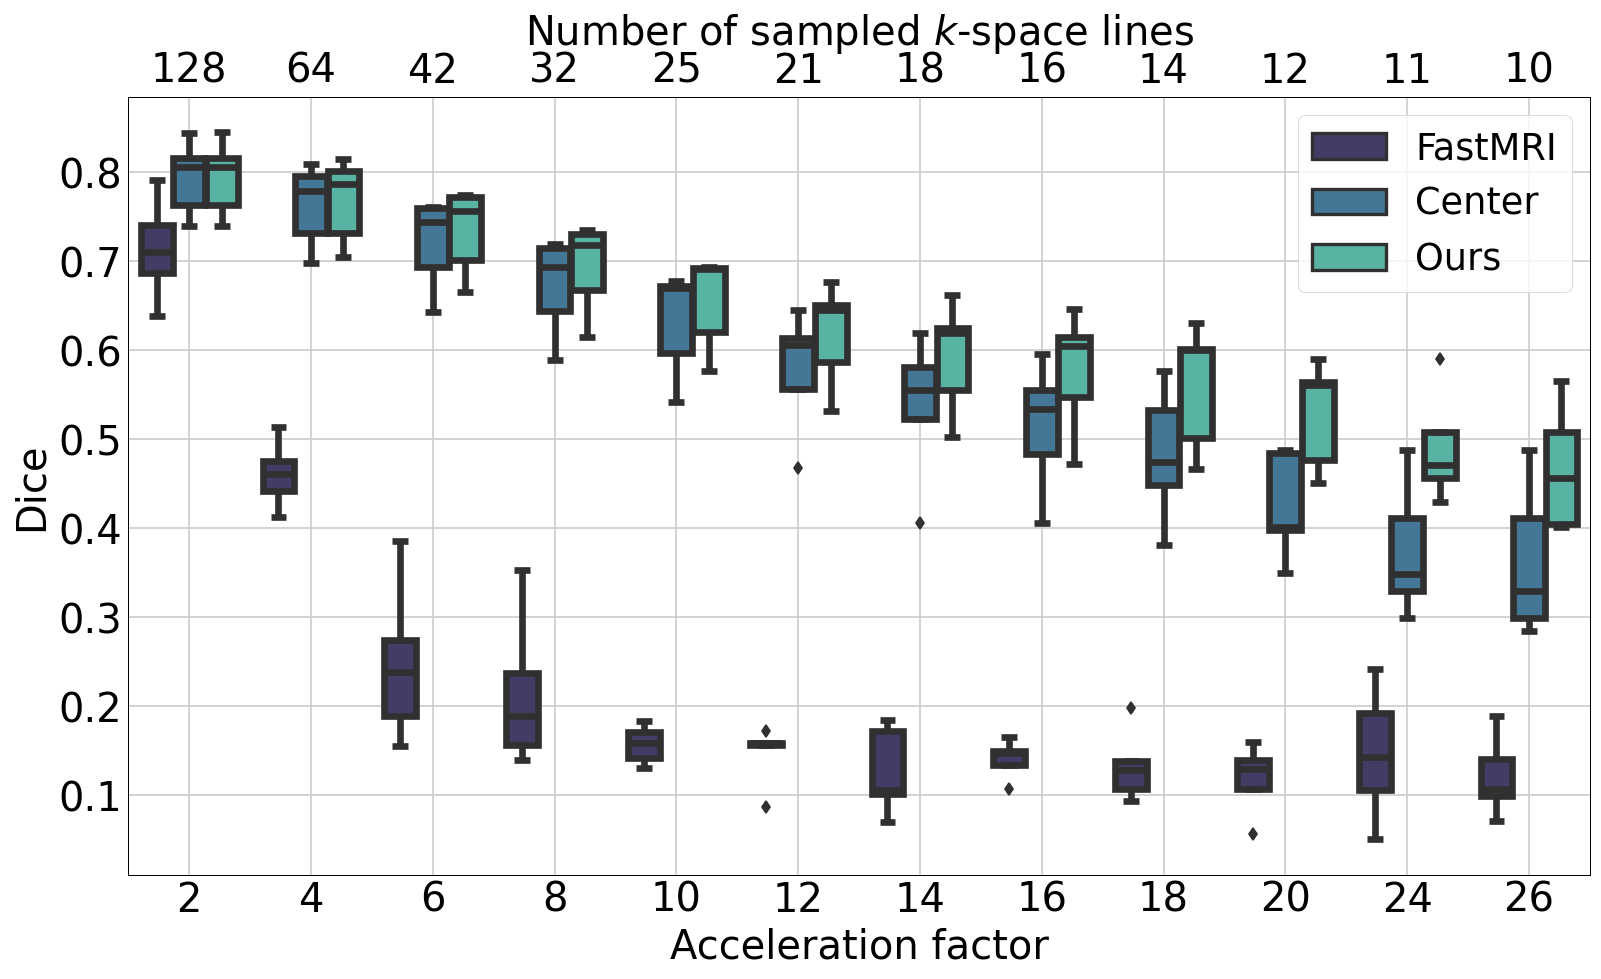

In [8]:
fig, ax1 = plt.subplots(figsize=(14,8), dpi=120)
ax1 = sns.boxplot(data=dice_ssim_folds, x='ax', y='dice', hue='sampling', palette='mako', ax=ax1)
ax2 = ax1.twiny()

# Turn grid of a on.
ax1.grid(True)
ax2.grid(False)

# Set ax's patch invisible
ax1.patch.set_visible(False)
# Set axtwin's patch visible and colorize it in grey
ax2.patch.set_visible(True)
ax1.set_zorder(ax2.get_zorder() + 1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
def tick_function(X): return ["%d" % z for z in 256 / (X * 2 + 2)]
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel(r"Number of sampled $\it{k}$-space lines", fontdict=dict(size=24))
ax1.set_xlabel(r"Acceleration factor", fontdict=dict(size=24))
ax1.set_ylabel(r"Dice", fontdict=dict(size=24))
# ax1.yaxis.grid(color='gray', linestyle='dashed')
# ax2.xaxis.grid(color='gray', linestyle='dashed')
# ax1.set_axisbelow(True)
# ax1.set_axisbelow(True)
# [line.set_zorder(3) for line in ax1.lines]
# plt.show()
ax1.tick_params(axis='both', labelsize=24)
ax2.tick_params(axis='both', labelsize=24)
L = ax1.legend(loc=1, prop={'size': 22})
L.get_texts()[0].set_text('FastMRI')
L.get_texts()[1].set_text('Center')
L.get_texts()[2].set_text('Ours')
plt.savefig('acdc-ax-curve.eps', bbox_inches = "tight")

In [9]:
dice_ssim_folds.columns = ['dice', 'ssim', r'$\bf{acceleration}$', r'$\bf{sampling}$', 'fold']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

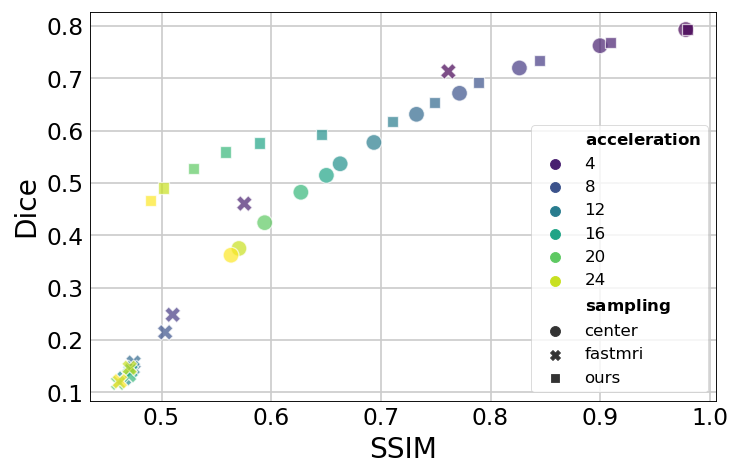

In [10]:
plt.figure(figsize=(6,4), dpi=120)
sns.scatterplot(data=dice_ssim_folds.groupby([r'$\bf{acceleration}$', r'$\bf{sampling}$']).mean(), x='ssim', y='dice', hue=r'$\bf{acceleration}$', style=r'$\bf{sampling}$', s=90, alpha=0.7, palette='viridis')
plt.xlabel('SSIM')
plt.ylabel('Dice')
plt.legend(loc=4, prop={'size': 10})
plt.savefig('acdc-ax-curve-3.eps', bbox_inches = "tight")

In [11]:
ssizes = list((list(set(dice_ssim_folds[r'$\bf{acceleration}$']))))

In [12]:
dice_ssim_folds[r'factor'] = -dice_ssim_folds[r'$\bf{acceleration}$']

In [13]:
_ssizes = list(sorted(list(set(dice_ssim_folds[r'factor']))))

In [14]:
ssizes

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 24, 26]

In [15]:
_ii = [1, 3, 5, 7, 9, 11]
ssizes_ = [ssizes[i] for i in _ii]
ssizes_

[4, 8, 12, 16, 20, 26]

In [16]:
_ii = [1, 3, 5, 7, 9, 11]
_ssizes_ = [_ssizes[i] for i in _ii]
_ssizes_

[-24, -18, -14, -10, -6, -2]

In [17]:
_ssizes

[-26, -24, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]

In [18]:
[320 // s for s in ssizes]

[160, 80, 53, 40, 32, 26, 22, 20, 17, 16, 13, 12]

In [19]:
6 

6

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

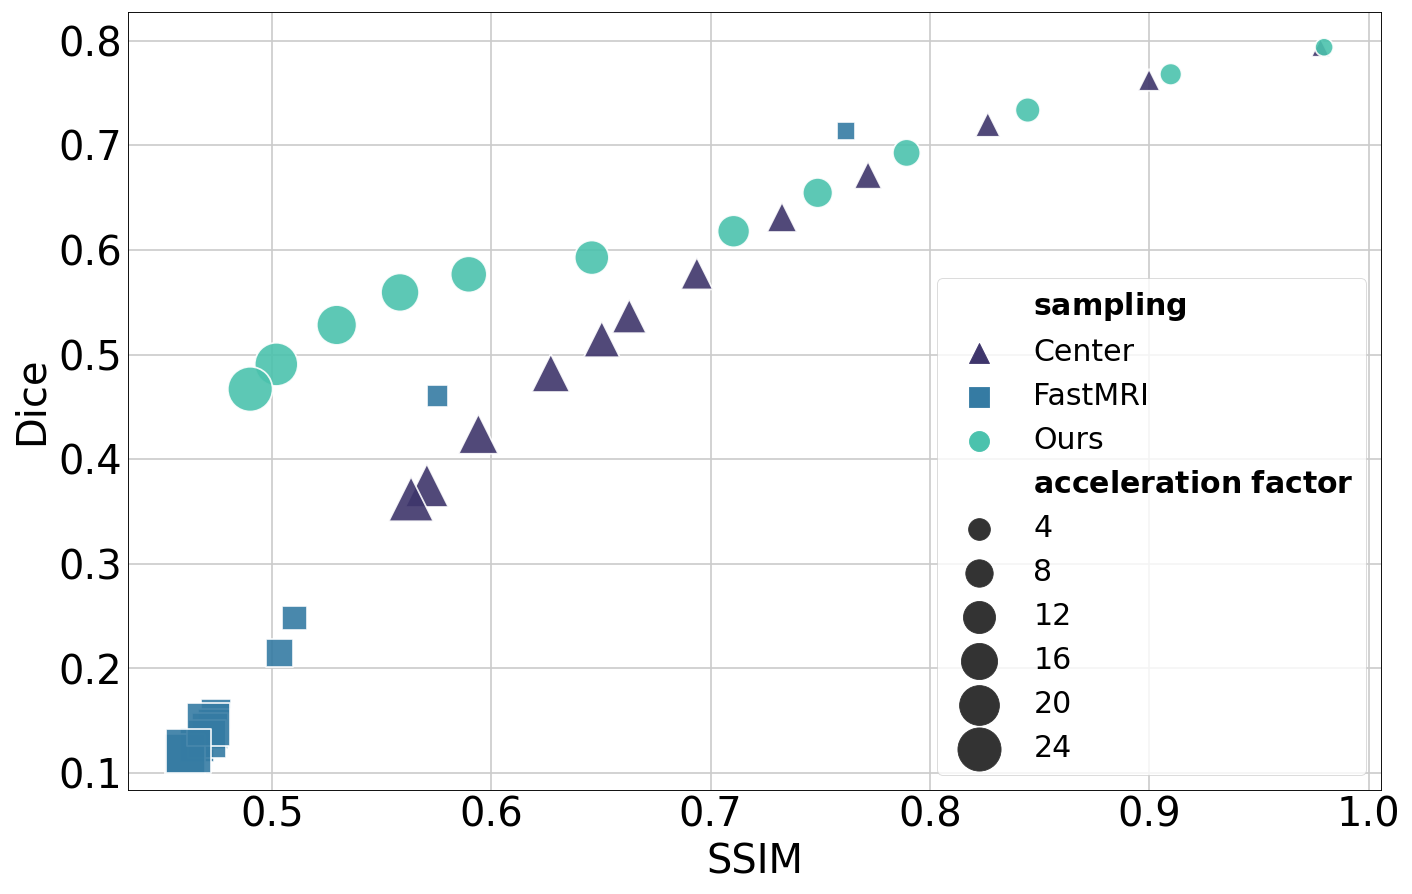

In [21]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(data=dice_ssim_folds.groupby([r'$\bf{acceleration}$', r'$\bf{sampling}$']).mean(), x='ssim', y='dice', 
                size=r'$\bf{acceleration}$', 
                sizes=(30 * 4,180 * 4),
                style=r'$\bf{sampling}$',
                hue=r'$\bf{sampling}$',
#                 color='g',
                markers=['^', 's', 'o'],
                alpha=0.9, palette='mako')
plt.xlabel('SSIM', fontdict=dict(size=24))
plt.ylabel('Dice', fontdict=dict(size=24))

plt.tick_params(axis='both', labelsize=24)
legend = plt.legend(loc=4, prop={'size': 18})
legend.get_texts()[4].set_text(r'$\bf{acceleration}$ $\bf{factor}$')
legend.legendHandles[1].set_sizes([36*4])
legend.legendHandles[2].set_sizes([36*4])
legend.legendHandles[3].set_sizes([36*4])
legend.get_texts()[1].set_text('Center')
legend.get_texts()[2].set_text('FastMRI')
legend.get_texts()[3].set_text('Ours')
# for i,s in enumerate(_ssizes_):
#     legend.get_texts()[5 + i].set_text(str(-s))
plt.savefig('acdc-ax-curve-4.eps', bbox_inches = "tight")